In [6]:
import numpy as np
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [20]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    r'C:\Users\jainj\OneDrive\Desktop\SIH\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 17572 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

In [8]:
cnn = tf.keras.models.load_model('trained_plant_disease_model.keras')

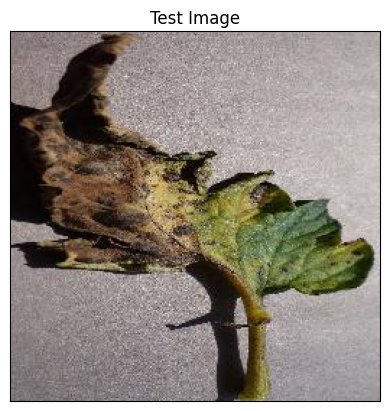

In [21]:
#Test Image Visualization
import cv2
image_path = r'C:\Users\jainj\OneDrive\Desktop\SIH\test\test\TomatoEarlyBlight1.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [16]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [17]:
print(predictions)

[[4.7801752e-14 3.7159185e-09 1.7919466e-22 3.9315678e-15 4.2786188e-21
  2.1404511e-17 2.3076523e-10 1.9852509e-24 5.4934102e-15 5.0369296e-20
  6.2146824e-19 7.1618819e-17 2.6819011e-10 3.8246404e-14 2.3198271e-22
  5.3339613e-26 2.1004708e-15 1.9901951e-16 1.5460813e-14 8.0414503e-14
  9.9640816e-12 1.8103914e-07 8.2679348e-09 3.7049461e-18 9.5998620e-10
  7.1899631e-18 1.4459068e-16 3.1287208e-14 4.4213571e-16 9.7597903e-01
  2.4020704e-02 1.7718773e-11 3.7012498e-08 1.8152857e-09 4.2948899e-13
  1.6845541e-14 4.2234956e-15 2.5187806e-16]]


In [18]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

29


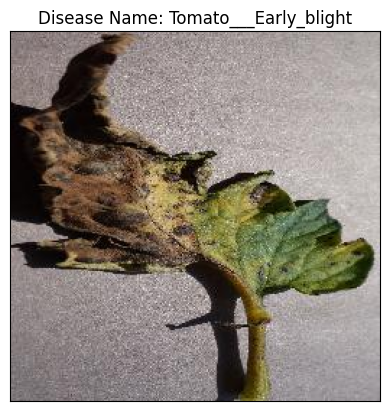

In [22]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()